In [318]:
import pandas as pd
import os
from os.path import join
import pylab as plt


generator_colors = [
    ("Petroleum Liquids", "#4B3621"),
    ("Natural Gas Internal Combustion Engine", "#808080"),
    ("Natural Gas Fired Combustion Turbine", "#B0B0B0"),
    ("Natural Gas Fired Combined Cycle", "gainsboro"),
    ("Landfill Gas", "peru"),
    ("Other Natural Gas", "firebrick"),
    ("Other Waste Biomass", "#8B4513"),
    ("Solar Photovoltaic", "#FFD700"),
    ("Onshore Wind Turbine", "#87CEEB"),
    ("Conventional Hydroelectric", "forestgreen"),
    ("Hydroelectric Pumped Storage", "limegreen"),
    ("Batteries", "#FF69B4"),
    ("IMPORT", "darkorchid"),
    ("Load Shed", "#FF0000"),
    ("Energy Storage", "orange"),
]

In [391]:
# Path the data directory
outputs_dir = join(os.getcwd(), '..', 'outputs', 'psps_0')
gen = pd.read_csv(join(outputs_dir, 'generation.csv'))
cap = pd.read_csv(join(outputs_dir, 'capacity.csv'))


grouped = gen.drop(columns=['gen_id', 'bus']).groupby(['fueltype']).sum()
grouped.loc["Energy Storage", :] *= -1

prices = pd.read_csv(join(outputs_dir, 'prices.csv'))

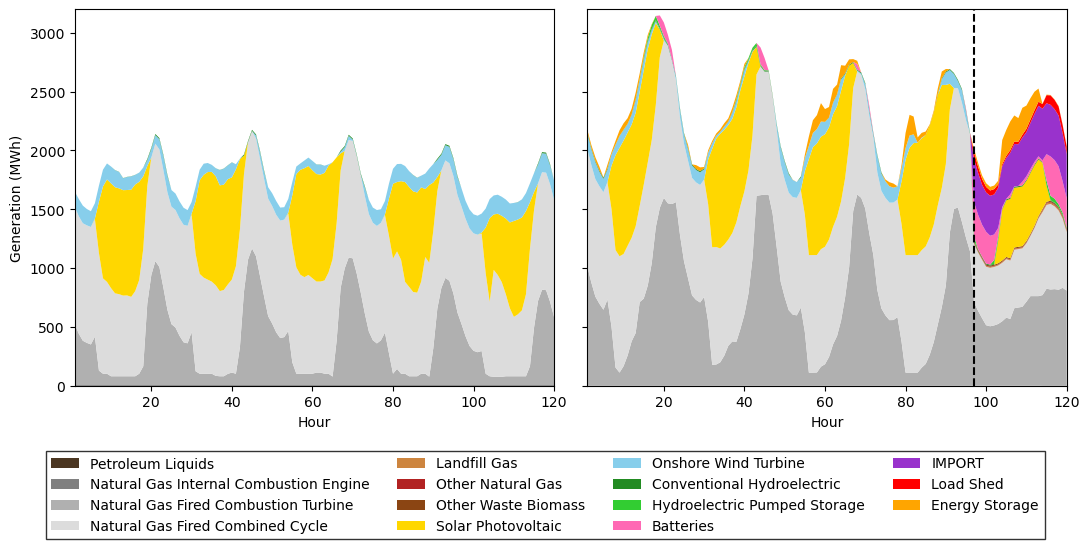

In [389]:
def generationplot(df, ax):
    df_sorted = df.loc[[i[0]for i in generator_colors]]
    y = df_sorted.to_numpy()
    ax.stackplot(range(1, len(y.T)+1), y, labels=df_sorted.index, colors=[i[1] for i in generator_colors]);
    ax.set_ylim(0, 3200)
    ax.set_xlabel("Hour")
    ax.set_xlim(1, 120)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5), sharey=True, layout='tight')

generationplot(grouped.iloc[:, 0:24*5], ax=ax1)
generationplot(grouped.iloc[:, 24*5:], ax=ax2)

ax1.set_ylabel("Generation (MWh)")
handles, labels = ax1.get_legend_handles_labels()
ax2.vlines([4*24+1],ymin=0, ymax=3200, color='k', ls='--')
lgd = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,0), ncol=4, fancybox=False, edgecolor='k')

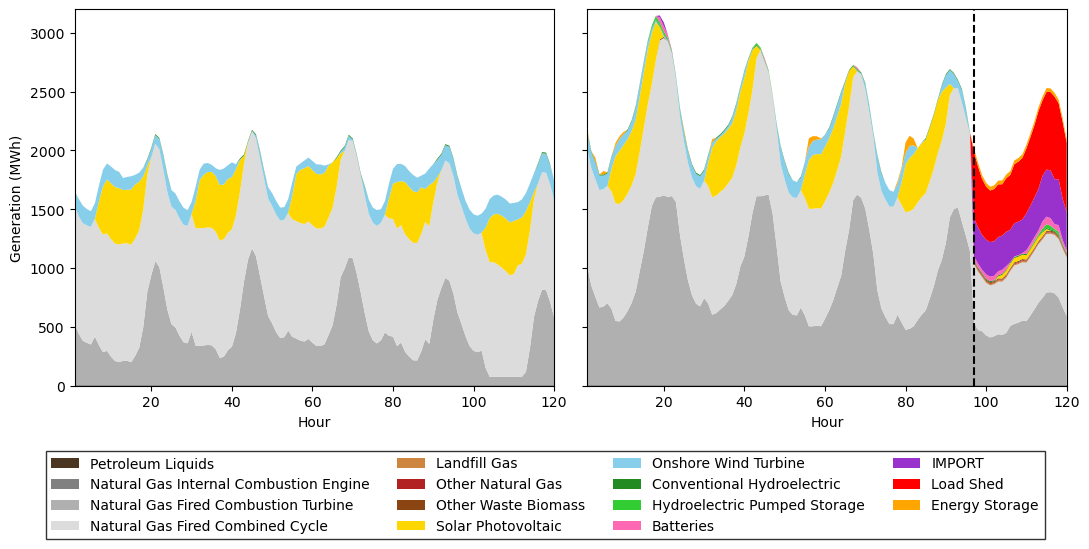

In [393]:
def generationplot(df, ax):
    df_sorted = df.loc[[i[0]for i in generator_colors]]
    y = df_sorted.to_numpy()
    ax.stackplot(range(1, len(y.T)+1), y, labels=df_sorted.index, colors=[i[1] for i in generator_colors]);
    ax.set_ylim(0, 3200)
    ax.set_xlabel("Hour")
    ax.set_xlim(1, 120)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5), sharey=True, layout='tight')

generationplot(grouped.iloc[:, 0:24*5], ax=ax1)
generationplot(grouped.iloc[:, 24*5:], ax=ax2)

ax1.set_ylabel("Generation (MWh)")
handles, labels = ax1.get_legend_handles_labels()
ax2.vlines([4*24+1],ymin=0, ymax=3200, color='k', ls='--')
lgd = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,0), ncol=4, fancybox=False, edgecolor='k')

In [356]:
grouped.iloc[:, :24*5]

,2018-05-07 00:00:00-05:00,2018-05-07 01:00:00-05:00,2018-05-07 02:00:00-05:00,2018-05-07 03:00:00-05:00,2018-05-07 04:00:00-05:00,2018-05-07 05:00:00-05:00,2018-05-07 06:00:00-05:00,2018-05-07 07:00:00-05:00,2018-05-07 08:00:00-05:00,2018-05-07 09:00:00-05:00,...,2018-05-11 14:00:00-05:00,2018-05-11 15:00:00-05:00,2018-05-11 16:00:00-05:00,2018-05-11 17:00:00-05:00,2018-05-11 18:00:00-05:00,2018-05-11 19:00:00-05:00,2018-05-11 20:00:00-05:00,2018-05-11 21:00:00-05:00,2018-05-11 22:00:00-05:00,2018-05-11 23:00:00-05:00
fueltype,,,,,,,,,,,,,,,,,,,,,
Batteries,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
Conventional Hydroelectric,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,0.000000,0.000000,0.000000,0.000000,8.9000,8.9000,8.9000,8.9000,0.0000
Energy Storage,-0.0000,-0.000,-0.0000,-0.0000,-0.000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
Hydroelectric Pumped Storage,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
IMPORT,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
Landfill Gas,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
Load Shed,0.0000,0.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
Natural Gas Fired Combined Cycle,998.0000,998.000,998.0000,998.0000,998.000,998.000000,998.000000,810.115909,779.715038,748.723158,...,525.844736,559.979837,695.672255,998.000000,998.000000,998.0000,998.0000,998.0000,998.0000,998.0000
Natural Gas Fired Combustion Turbine,519.5536,438.811,379.3576,361.4749,347.963,413.582531,125.762090,99.400000,99.400000,77.700000,...,77.700000,77.700000,77.700000,163.619548,489.190142,717.3899,813.0314,809.0656,709.3762,577.3107


,gen_id,bus,fueltype,capacity
0,4,13,Batteries,0.000000
1,5,13,Solar Photovoltaic,0.000000
2,11,21,Solar Photovoltaic,0.000000
3,12,23,Solar Photovoltaic,35.226657
4,13,43,Batteries,0.000000
...,...,...,...,...
305,359,458,Batteries,0.000000
306,360,87,Batteries,0.000000
307,361,68,Batteries,7.390907
308,362,91,Batteries,0.000000


In [ ]:
# How much capacity in each senario? - show bar plot
# Where is caacity in each senario? - join capacity with map

## TODO: 6 senarios?
# budget 0, 100M, unrestricted
# lines on and off


In [183]:
soc = pd.read_csv(join(outputs_dir, 'soc.csv'))

<Axes: >

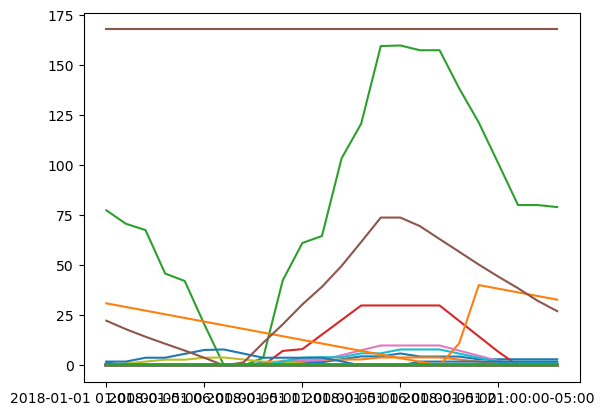

In [185]:
soc.T.iloc[0:-3,:].plot(legend=False)

<Axes: >

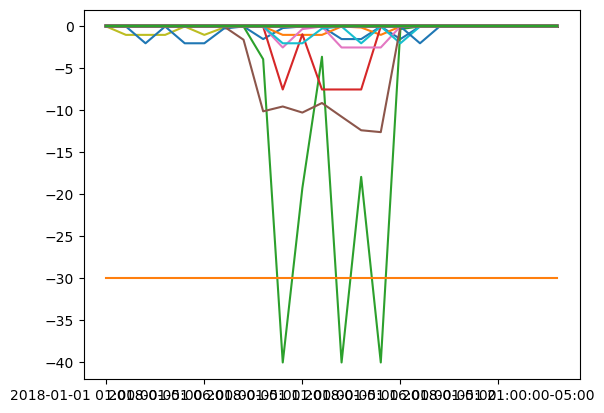

In [187]:
gen[gen['fueltype'] == "Energy Storage"].iloc[:,0:-3].T.plot(legend=False)

<Axes: >

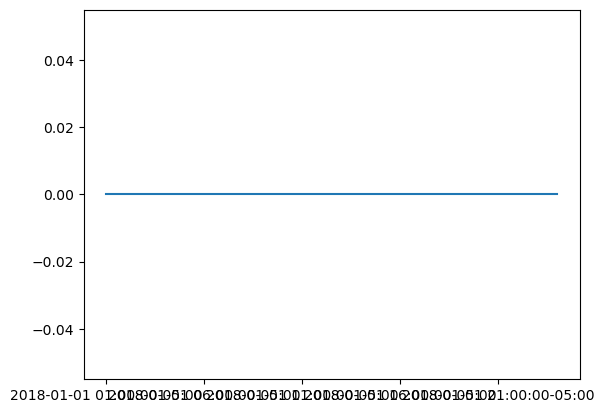

In [189]:
gen[gen['fueltype'] == "Hydroelectric Pumped Storage"].iloc[:,0:-3].T.plot(legend=False)

In [254]:
gen

,2018-01-01 01:00:00-05:00,2018-01-01 02:00:00-05:00,2018-01-01 03:00:00-05:00,2018-01-01 04:00:00-05:00,2018-01-01 05:00:00-05:00,2018-01-01 06:00:00-05:00,2018-01-01 07:00:00-05:00,2018-01-01 08:00:00-05:00,2018-01-01 09:00:00-05:00,2018-01-01 10:00:00-05:00,...,2018-01-01 18:00:00-05:00,2018-01-01 19:00:00-05:00,2018-01-01 20:00:00-05:00,2018-01-01 21:00:00-05:00,2018-01-01 22:00:00-05:00,2018-01-01 23:00:00-05:00,2018-01-02 00:00:00-05:00,gen_id,bus,fueltype
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,IMPORT
1,1.4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,1.4,1.4,1.4,1.4,1.4,1.4,1.4,2,7,Conventional Hydroelectric
2,60.5,60.5,60.5,60.5,60.5,60.5,60.500000,60.500000,60.50000,60.500000,...,60.5,60.5,60.5,60.5,60.5,60.5,60.5,3,12,Natural Gas Fired Combustion Turbine
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,13,Batteries
4,0.0,0.0,0.0,0.0,0.0,0.0,0.417614,12.987787,20.37955,20.296027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,13,Solar Photovoltaic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.00000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,359,458,Energy Storage
1001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.00000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,360,87,Energy Storage
1002,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.00000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,361,68,Energy Storage
1003,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.00000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,362,91,Energy Storage


In [258]:
battery_gen = gen[gen['gen_id'].isin(soc['gen_id'])]

In [260]:
battery_gen[(battery_gen.drop(columns=['bus']).set_index(['gen_id', 'fueltype']).sum(axis=1) != 0).values]

,2018-01-01 01:00:00-05:00,2018-01-01 02:00:00-05:00,2018-01-01 03:00:00-05:00,2018-01-01 04:00:00-05:00,2018-01-01 05:00:00-05:00,2018-01-01 06:00:00-05:00,2018-01-01 07:00:00-05:00,2018-01-01 08:00:00-05:00,2018-01-01 09:00:00-05:00,2018-01-01 10:00:00-05:00,...,2018-01-01 18:00:00-05:00,2018-01-01 19:00:00-05:00,2018-01-01 20:00:00-05:00,2018-01-01 21:00:00-05:00,2018-01-01 22:00:00-05:00,2018-01-01 23:00:00-05:00,2018-01-02 00:00:00-05:00,gen_id,bus,fueltype


In [301]:
soc[(soc.iloc[:, 20] != 0)]

,2018-01-01 01:00:00-05:00,2018-01-01 02:00:00-05:00,2018-01-01 03:00:00-05:00,2018-01-01 04:00:00-05:00,2018-01-01 05:00:00-05:00,2018-01-01 06:00:00-05:00,2018-01-01 07:00:00-05:00,2018-01-01 08:00:00-05:00,2018-01-01 09:00:00-05:00,2018-01-01 10:00:00-05:00,...,2018-01-01 18:00:00-05:00,2018-01-01 19:00:00-05:00,2018-01-01 20:00:00-05:00,2018-01-01 21:00:00-05:00,2018-01-01 22:00:00-05:00,2018-01-01 23:00:00-05:00,2018-01-02 00:00:00-05:00,gen_id,bus,fueltype
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.74,40.74,81.48,...,129.896907,129.896907,86.597938,86.597938,43.298969,43.298969,0.0,39,100,Hydroelectric Pumped Storage


In [264]:
battery_gen

,2018-01-01 01:00:00-05:00,2018-01-01 02:00:00-05:00,2018-01-01 03:00:00-05:00,2018-01-01 04:00:00-05:00,2018-01-01 05:00:00-05:00,2018-01-01 06:00:00-05:00,2018-01-01 07:00:00-05:00,2018-01-01 08:00:00-05:00,2018-01-01 09:00:00-05:00,2018-01-01 10:00:00-05:00,...,2018-01-01 18:00:00-05:00,2018-01-01 19:00:00-05:00,2018-01-01 20:00:00-05:00,2018-01-01 21:00:00-05:00,2018-01-01 22:00:00-05:00,2018-01-01 23:00:00-05:00,2018-01-02 00:00:00-05:00,gen_id,bus,fueltype
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,13,Batteries
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,43,Batteries
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,47,Batteries
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,54,Batteries
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,60,Batteries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,359,458,Energy Storage
1001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,360,87,Energy Storage
1002,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,361,68,Energy Storage
1003,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,362,91,Energy Storage


In [299]:
[gen[gen["fueltype"] == "Energy Storage"].iloc[:, i].min() for i in range(24)]

[-0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -42.0,
 -0.0,
 -42.0,
 -0.0,
 -5.1958762886598,
 -0.0,
 -42.0,
 -42.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0]

In [268]:
grouped

,2018-01-01 01:00:00-05:00,2018-01-01 02:00:00-05:00,2018-01-01 03:00:00-05:00,2018-01-01 04:00:00-05:00,2018-01-01 05:00:00-05:00,2018-01-01 06:00:00-05:00,2018-01-01 07:00:00-05:00,2018-01-01 08:00:00-05:00,2018-01-01 09:00:00-05:00,2018-01-01 10:00:00-05:00,...,2018-01-01 15:00:00-05:00,2018-01-01 16:00:00-05:00,2018-01-01 17:00:00-05:00,2018-01-01 18:00:00-05:00,2018-01-01 19:00:00-05:00,2018-01-01 20:00:00-05:00,2018-01-01 21:00:00-05:00,2018-01-01 22:00:00-05:00,2018-01-01 23:00:00-05:00,2018-01-02 00:00:00-05:00
fueltype,,,,,,,,,,,,,,,,,,,,,
Batteries,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
Conventional Hydroelectric,8.9000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,8.9000,8.9000,8.9000,8.9000,8.9000,8.9000,8.900
Energy Storage,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
Hydroelectric Pumped Storage,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
IMPORT,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
Landfill Gas,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
Load Shed,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
Natural Gas Fired Combined Cycle,998.0000,998.0000,998.000,998.0000,998.0000,998.0000,998.000000,998.000000,998.000000,998.000000,...,995.481739,998.000000,998.0000,998.0000,998.0000,998.0000,998.0000,998.0000,998.0000,998.000
Natural Gas Fired Combustion Turbine,610.4039,549.0049,546.656,510.1198,496.3646,523.5261,574.847853,382.868393,242.042923,184.807614,...,73.200000,365.725943,598.7458,856.2557,1010.8436,983.4989,955.2994,908.5568,809.2756,678.242


In [388]:
0.145*(10**9)

145000000.0